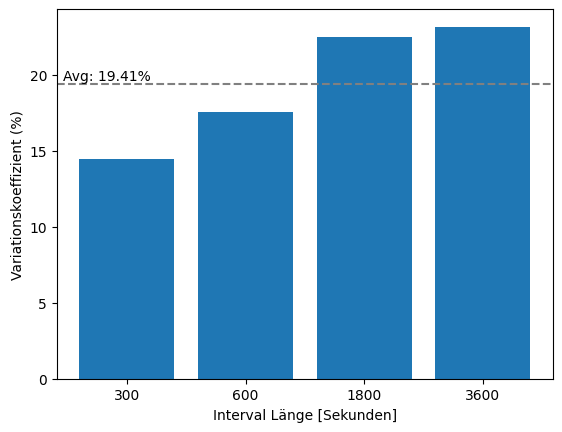

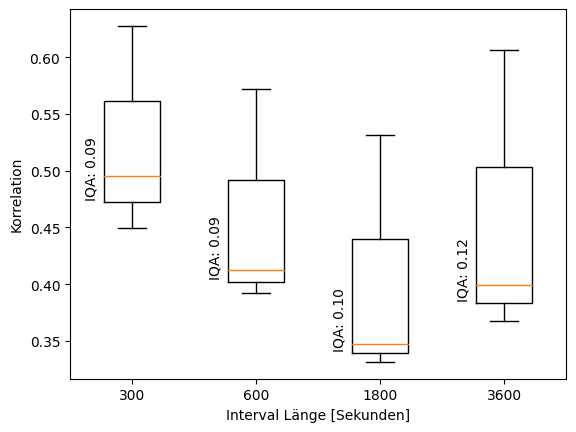

In [76]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

# rootPath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Recording_15_06_Evening\MatchRateComparisons"
rootPath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\PC_Windows_Ethernet\Analyse\ResultMatchRate\EigenImpl"

# outfolder = r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images"
outfolder =r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\PC_Windows_Ethernet\Analyse" 

paths = os.listdir(rootPath)

TPObsList = {}
obslenList = [300,600,1800,3600]


for file_path in paths:    
	# JSON-Daten aus der Datei laden
	with open(os.path.join(rootPath,file_path), "r") as file:
		data = json.load(file)
		
	tpList = []

	for obsLen in data["Item1"]["_results"]:
		interval_len = obsLen["IntervalLen"]
		tp_value = obsLen["TP"]
        
		if interval_len not in TPObsList:
			TPObsList[interval_len] = []
		TPObsList[interval_len].append(tp_value)
        
		# print(TPObsList)


coefList = []

for obsLen in obslenList:
	mean = np.mean(TPObsList[obsLen])
	varCoeff = np.std(TPObsList[obsLen]) / mean * 100
	coefList.append(varCoeff)
	
	
plt.axhline(np.average(coefList), color='gray', linestyle='--')
# Wert an der horizontalen Linie platzieren
plt.text(0.2, np.average(coefList)+0.05, "Avg: "+str(round(np.average(coefList),2))+"%", ha='right', va='bottom')

# Erstellen des Balkendiagramms
plt.bar(range(len(obslenList)), coefList, align='center')
plt.xticks(range(len(obslenList)), obslenList)
plt.xlabel("Interval Länge [Sekunden]")
plt.ylabel("Variationskoeffizient (%)")
# plt.title("Variationskoeffizient für verschiedene Intervallängen")
plt.savefig(os.path.join(outfolder,"Variationskoeff_V2.png"), dpi=300)
plt.show()

boxes = plt.boxplot([TPObsList[obsLen] for obsLen in obslenList], labels=[str(obsLen) for obsLen in obslenList])
plt.xlabel("Interval Länge [Sekunden]")
plt.ylabel("Korrelation")
# Interquartilabstand berechnen
# Interquartilabstand berechnen
for i, box in enumerate(boxes['boxes']):
    q1 = np.percentile(TPObsList[obslenList[i]], 25)
    q3 = np.percentile(TPObsList[obslenList[i]], 75)
    iqr = q3 - q1

    # Interquartilabstand als Text im Diagramm anzeigen
    # Boxplot zeichnen
# x-Koordinaten der Box abrufen
    box_x = box.get_xdata()

    # IQR-Text anzeigen
    plt.text(box_x[0]-0.1, box.get_ydata()[0]+0.03, f"IQA: {iqr:.2f}", ha='center', va='center', rotation='vertical')


# plt.title("TP Korrelationswerte für verschiedene Intervallängen")
# plt.savefig(os.path.join(outfolder,"TP_MatchVariation_boxplott_V2.png"), dpi=300)
plt.show()

# Plott from BatchResult SelfImplemenation

obslen300 - [0.736111111111111, 0.736111111111111, 0.763888888888889, 0.712121212121212, 0.712121212121212, 0.7708333333333334, 0.736111111111111, 0.7083333333333334, 0.4833333333333334, 0.712121212121212]
obslen600 - [0.7041666666666667, 0.7041666666666667, 0.7354166666666667, 0.661904761904762, 0.661904761904762, 0.7416666666666667, 0.7041666666666667, 0.6791666666666667, 0.4642857142857143, 0.73125]
obslen900 - [0.7095238095238094, 0.7095238095238094, 0.738095238095238, 0.7095238095238094, 0.7095238095238094, 0.7416666666666666, 0.7095238095238094, 0.680952380952381, 0.6, 0.7095238095238094]
obslen1800 - [0.7833333333333333, 0.7833333333333333, 0.8166666666666668, 0.7833333333333333, 0.7833333333333333, 0.8257575757575758, 0.7833333333333333, 0.75, 0.671957671957672, 0.7833333333333333]
obslen3600 - [0.8333333333333333, 0.8333333333333333, 0.8611111111111112, 0.8333333333333333, 0.8333333333333333, 0.868421052631579, 0.8333333333333333, 0.8055555555555556, 0.75, 0.8333333333333333]


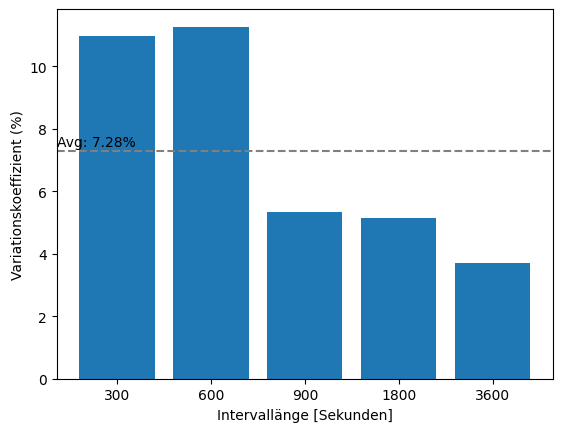

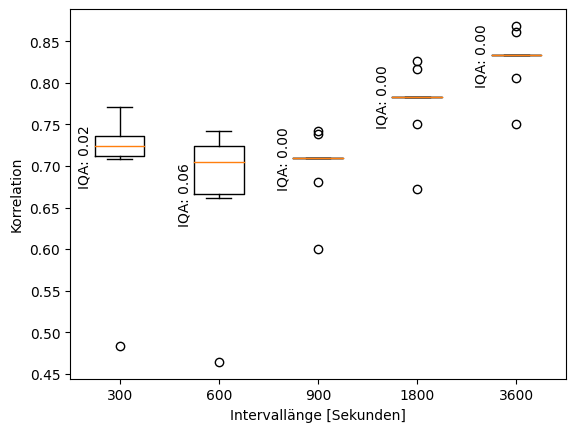

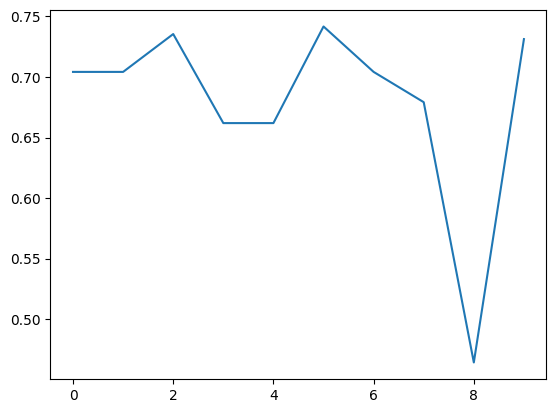

In [44]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

# rootPath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Recording_15_06_Evening\MatchRateComparisons"
rootPath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Recording_ShortForReproduciability\Analyse\TP_selfImplBatch"

# outfolder = r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images"
outfolder =r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Recording_ShortForReproduciability\Analyse" 

paths = os.listdir(rootPath)

TPObsList = {}
obslenList = [300,600,900,1800,3600]


for file_path in paths:    
	# JSON-Daten aus der Datei laden
	with open(os.path.join(rootPath,file_path), "r") as file:
		data = json.load(file)
		
	tpList = []

	for obsLen in data:
		interval_len = obsLen["IntervalLen"]
		tp_value = obsLen["TP"]
		
		if interval_len not in TPObsList:
			TPObsList[interval_len] = []
		TPObsList[interval_len].append(tp_value)
		
		# print(TPObsList)


coefList = []

for obsLen in obslenList:
	print("obslen"+str(obsLen)+" - " +str(TPObsList[obsLen]))
	mean = np.mean(TPObsList[obsLen])
	varCoeff = np.std(TPObsList[obsLen]) / mean * 100
	coefList.append(varCoeff)
	
	
plt.axhline(np.average(coefList), color='gray', linestyle='--')
# Wert an der horizontalen Linie platzieren
plt.text(0.2, np.average(coefList)+0.05, "Avg: "+str(round(np.average(coefList),2))+"%", ha='right', va='bottom')

# Erstellen des Balkendiagramms
plt.bar(range(len(obslenList)), coefList, align='center')
plt.xticks(range(len(obslenList)), obslenList)
plt.xlabel("Intervallänge [Sekunden]")
plt.ylabel("Variationskoeffizient (%)")
# plt.title("Variationskoeffizient für verschiedene Intervallängen")
plt.savefig(os.path.join(outfolder,"Variationskoeff_selfImpl_10x_v3.png"), dpi=300)
plt.show()

boxes = plt.boxplot([TPObsList[obsLen] for obsLen in obslenList], labels=[str(obsLen) for obsLen in obslenList])

plt.xlabel("Intervallänge [Sekunden]")
plt.ylabel("Korrelation")
# Interquartilabstand berechnen
# Interquartilabstand berechnen
for i, box in enumerate(boxes['boxes']):
	q1 = np.percentile(TPObsList[obslenList[i]], 25)
	q3 = np.percentile(TPObsList[obslenList[i]], 75)
	iqr = q3 - q1

	# Interquartilabstand als Text im Diagramm anzeigen
	# Boxplot zeichnen
# x-Koordinaten der Box abrufen
	box_x = box.get_xdata()

	# IQR-Text anzeigen
	plt.text(box_x[0]-0.1, box.get_ydata()[0]+0.0, f"IQA: {iqr:.2f}", ha='center', va='center', rotation='vertical')


# plt.title("TP Korrelationswerte für verschiedene Intervallängen")
plt.savefig(os.path.join(outfolder,"TP_MatchVariation_boxplott_selfImpl_10x_V3.png"), dpi=300)
plt.show()

plt.plot(np.arange(len(TPObsList[600])),TPObsList[600])
plt.show()

obslen300 - [0.736111111111111, 0.736111111111111, 0.763888888888889, 0.712121212121212, 0.712121212121212, 0.7708333333333334, 0.736111111111111, 0.7083333333333334, 0.4833333333333334, 0.712121212121212]
obslen900 - [0.7095238095238094, 0.7095238095238094, 0.738095238095238, 0.7095238095238094, 0.7095238095238094, 0.7416666666666666, 0.7095238095238094, 0.680952380952381, 0.6, 0.7095238095238094]
obslen1800 - [0.7833333333333333, 0.7833333333333333, 0.8166666666666668, 0.7833333333333333, 0.7833333333333333, 0.8257575757575758, 0.7833333333333333, 0.75, 0.671957671957672, 0.7833333333333333]


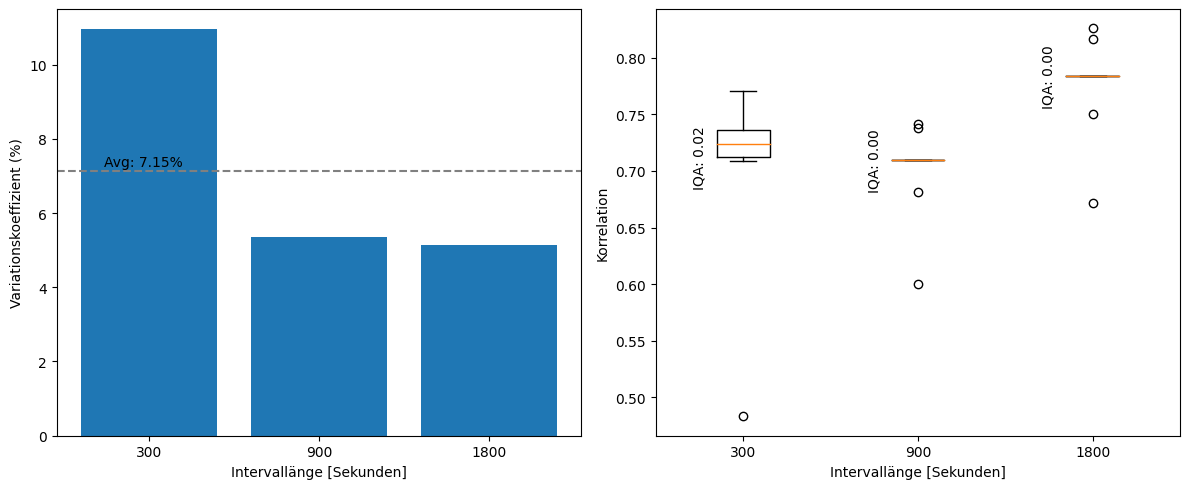

In [42]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

# rootPath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Recording_15_06_Evening\MatchRateComparisons"
rootPath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Recording_ShortForReproduciability\Analyse\TP_selfImplBatch"

# outfolder = r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images"
outfolder = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Recording_ShortForReproduciability\Analyse" 

paths = os.listdir(rootPath)

TPObsList = {}
obslenList = [300, 900, 1800]

for file_path in paths:    
    # JSON-Daten aus der Datei laden
    with open(os.path.join(rootPath, file_path), "r") as file:
        data = json.load(file)
        
    tpList = []

    for obsLen in data:
        interval_len = obsLen["IntervalLen"]
        tp_value = obsLen["TP"]
        
        if interval_len not in TPObsList:
            TPObsList[interval_len] = []
        TPObsList[interval_len].append(tp_value)
        
# Calculate coefficient of variation (CV) for each obslen
coefList = []
for obsLen in obslenList:
    print("obslen" + str(obsLen) + " - " + str(TPObsList[obsLen]))
    mean = np.mean(TPObsList[obsLen])
    varCoeff = np.std(TPObsList[obsLen]) / mean * 100
    coefList.append(varCoeff)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the bar chart in the first subplot (left side)
ax1.axhline(np.average(coefList), color='gray', linestyle='--')
ax1.text(0.2, np.average(coefList) + 0.05, "Avg: " + str(round(np.average(coefList), 2)) + "%", ha='right', va='bottom')
ax1.bar(range(len(obslenList)), coefList, align='center')
ax1.set_xticks(range(len(obslenList)))
ax1.set_xticklabels(obslenList)
ax1.set_xlabel("Intervallänge [Sekunden]")
ax1.set_ylabel("Variationskoeffizient (%)")

# Plot the boxplot in the second subplot (right side)
boxes = ax2.boxplot([TPObsList[obsLen] for obsLen in obslenList], labels=[str(obsLen) for obsLen in obslenList])
ax2.set_xlabel("Intervallänge [Sekunden]")
ax2.set_ylabel("Korrelation")
for i, box in enumerate(boxes['boxes']):
    q1 = np.percentile(TPObsList[obslenList[i]], 25)
    q3 = np.percentile(TPObsList[obslenList[i]], 75)
    iqr = q3 - q1
    box_x = box.get_xdata()
    ax2.text(box_x[0]-0.1, box.get_ydata()[0]+0.0, f"IQA: {iqr:.2f}", ha='center', va='center', rotation='vertical')

# ax2.set_ylim(0.3)

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig(os.path.join(outfolder, "Combined_Plots.png"), dpi=300)
plt.show()	


obslen900 - [0.7095238095238094, 0.7095238095238094, 0.738095238095238, 0.7095238095238094, 0.7095238095238094, 0.7416666666666666, 0.7095238095238094, 0.680952380952381, 0.6, 0.7095238095238094]


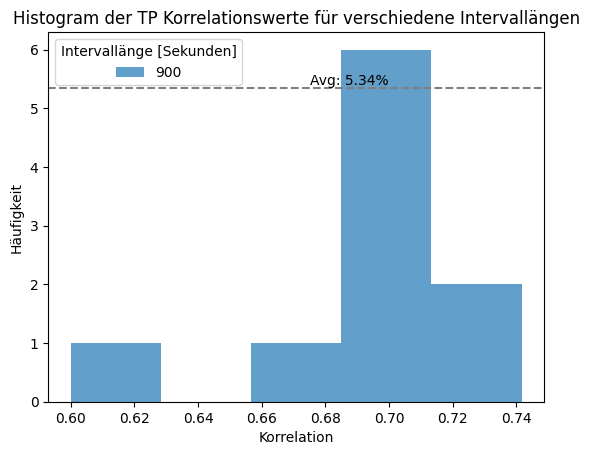

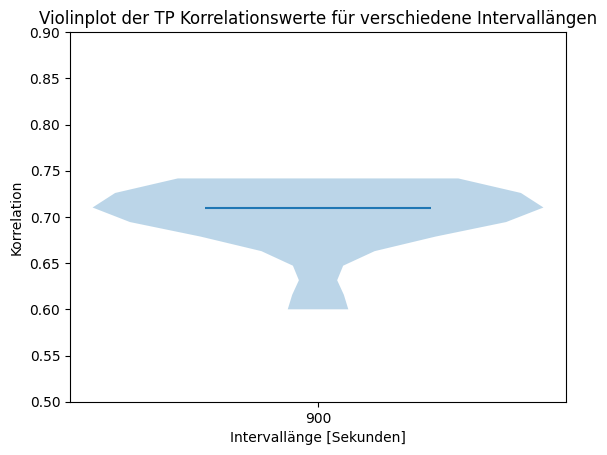

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

rootPath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Recording_ShortForReproduciability\Analyse\TP_selfImplBatch"
outfolder = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Recording_ShortForReproduciability\Analyse"

paths = os.listdir(rootPath)

TPObsList = {}
obslenList = [900]

for file_path in paths:    
    with open(os.path.join(rootPath, file_path), "r") as file:
        data = json.load(file)

    tpList = []

    for obsLen in data:
        interval_len = obsLen["IntervalLen"]
        tp_value = obsLen["TP"]

        if interval_len not in TPObsList:
            TPObsList[interval_len] = []
        TPObsList[interval_len].append(tp_value)

coefList = []

for obsLen in obslenList:
    print("obslen" + str(obsLen) + " - " + str(TPObsList[obsLen]))
    mean = np.mean(TPObsList[obsLen])
    varCoeff = np.std(TPObsList[obsLen]) / mean * 100
    coefList.append(varCoeff)

plt.axhline(np.average(coefList), color='gray', linestyle='--')
plt.text(0.7, np.average(coefList) + 0., "Avg: " + str(round(np.average(coefList), 2)) + "%", ha='right', va='bottom')

# Create histograms for each interval length
data_for_histogram = [TPObsList[obsLen] for obsLen in obslenList]
plt.hist(data_for_histogram, bins='auto', alpha=0.7, label=[str(obsLen) for obsLen in obslenList])

plt.xlabel("Korrelation")
plt.ylabel("Häufigkeit")
plt.legend(title="Intervallänge [Sekunden]")
plt.title("Histogram der TP Korrelationswerte für verschiedene Intervallängen")
plt.savefig(os.path.join(outfolder, "TP_MatchVariation_histogram_selfImpl_10x_V3.png"), dpi=300)
plt.show()


# Create violin plots for each interval length
plt.violinplot(data_for_histogram, showmedians=True, showextrema=False, points=10)
plt.ylim(0.5,0.9)
plt.xlabel("Intervallänge [Sekunden]")
plt.ylabel("Korrelation")
plt.xticks(range(1, len(obslenList) + 1), obslenList)
plt.title("Violinplot der TP Korrelationswerte für verschiedene Intervallängen")
plt.savefig(os.path.join(outfolder, "TP_MatchVariation_violinplot_selfImpl_10x_V3.png"), dpi=300)
plt.show()


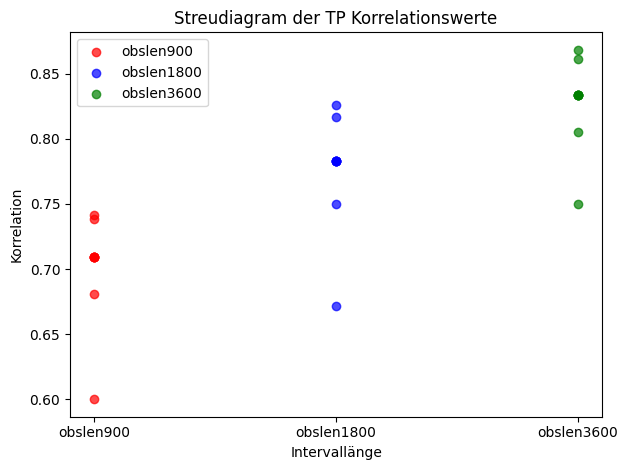

In [23]:
import matplotlib.pyplot as plt

# Given data
obslen900 = [0.7095238095238094, 0.7095238095238094, 0.738095238095238, 0.7095238095238094, 0.7095238095238094, 0.7416666666666666, 0.7095238095238094, 0.680952380952381, 0.6, 0.7095238095238094]
obslen1800 = [0.7833333333333333, 0.7833333333333333, 0.8166666666666668, 0.7833333333333333, 0.7833333333333333, 0.8257575757575758, 0.7833333333333333, 0.75, 0.671957671957672, 0.7833333333333333]
obslen3600 = [0.8333333333333333, 0.8333333333333333, 0.8611111111111112, 0.8333333333333333, 0.8333333333333333, 0.868421052631579, 0.8333333333333333, 0.8055555555555556, 0.75, 0.8333333333333333]

# Prepare x-axis values for each data
x_obslen900 = [1] * len(obslen900)
x_obslen1800 = [2] * len(obslen1800)
x_obslen3600 = [3] * len(obslen3600)

# Create the scatter plot
plt.scatter(x_obslen900, obslen900, color='red', label='obslen900', alpha=0.7)
plt.scatter(x_obslen1800, obslen1800, color='blue', label='obslen1800', alpha=0.7)
plt.scatter(x_obslen3600, obslen3600, color='green', label='obslen3600', alpha=0.7)

# Add legend, labels, and title
plt.legend()
plt.xlabel("Intervallänge")
plt.ylabel("Korrelation")
plt.title("Streudiagram der TP Korrelationswerte")

# Adjust x-axis ticks and labels
plt.xticks([1, 2, 3], ["obslen900", "obslen1800", "obslen3600"])

# Show the plot
plt.tight_layout()
plt.savefig("TP_MatchVariation_scatter_plot.png", dpi=300)
plt.show()


In [ ]:
obslen900 = [0.7095238095238094, 0.7095238095238094, 0.738095238095238, 0.7095238095238094, 0.7095238095238094, 0.7416666666666666, 0.7095238095238094, 0.680952380952381, 0.6, 0.7095238095238094]
obslen1800 = [0.7833333333333333, 0.7833333333333333, 0.8166666666666668, 0.7833333333333333, 0.7833333333333333, 0.8257575757575758, 0.7833333333333333, 0.75, 0.671957671957672, 0.7833333333333333]
obslen3600 = [0.8333333333333333, 0.8333333333333333, 0.8611111111111112, 0.8333333333333333, 0.8333333333333333, 0.868421052631579, 0.8333333333333333, 0.8055555555555556, 0.75, 0.8333333333333333]



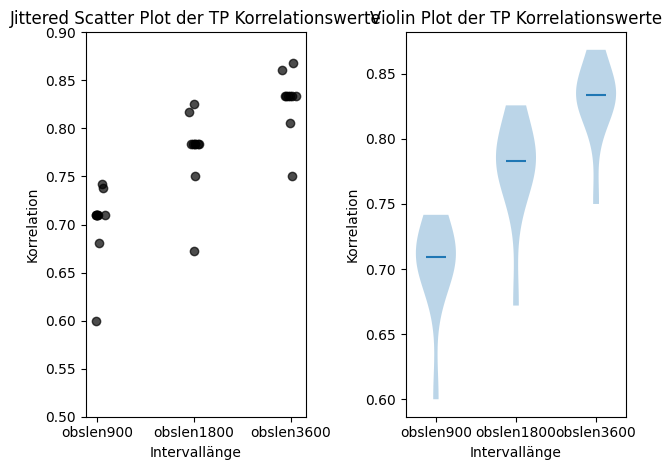

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Combine data for the box plot
data_for_boxplot = [obslen900, obslen1800, obslen3600]

# Create a custom jittered scatter plot
plt.subplot(1, 2, 1)
for i, data in enumerate(data_for_boxplot, start=1):
    x = np.random.normal(i, 0.04, size=len(data))  # Adding jitter to the x-axis positions
    plt.scatter(x, data, color='black', alpha=0.7)

plt.xlabel("Intervallänge")
plt.ylabel("Korrelation")
# plt.title("Jittered Scatter Plot der TP Korrelationswerte")
plt.xticks(range(1, len(data_for_boxplot) + 1), ["obslen900", "obslen1800", "obslen3600"])
plt.ylim(0.5, 0.9)  # Adjust the y-axis limits for better visibility

# Create a violin plot
plt.subplot(1, 2, 2)
plt.violinplot(data_for_boxplot, showmedians=True, showextrema=False, points=100)
plt.xlabel("Intervallänge")
plt.ylabel("Korrelation")
# plt.title("Violin Plot der TP Korrelationswerte")
plt.xticks(range(1, len(data_for_boxplot) + 1), ["obslen900", "obslen1800", "obslen3600"])

plt.tight_layout()
plt.savefig(os.path.join(outfolder, "TP_MatchVariation_jittered_violin_plot_selfImpl_10x_V8.png"), dpi=300)
plt.show()



c:\Users\Linus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


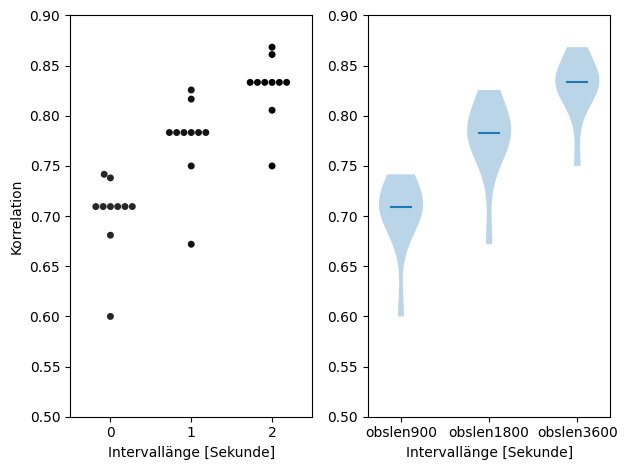

In [38]:
import seaborn as sns

# Combine data for the box plot
data_for_boxplot = [obslen900, obslen1800, obslen3600]
label=[900, 1800 , 3600]
# Create a swarm plot
plt.subplot(1, 2, 1)
sns.swarmplot(data=data_for_boxplot, color="black", alpha=1)
plt.xlabel("Intervallänge [Sekunde]")
plt.ylabel("Korrelation")
# plt.title("Swarm Plot der TP Korrelationswerte")
plt.ylim(0.5, 0.9)  # Adjust the y-axis limits for better visibility

# Create a violin plot
plt.subplot(1, 2, 2)
plt.violinplot(data_for_boxplot, showmedians=True, showextrema=False, points=100)
plt.xlabel("Intervallänge [Sekunde]")
# plt.yticks([])
plt.ylabel("Korrelation")
plt.ylabel("")
# plt.title("Violin Plot der TP Korrelationswerte")
plt.xticks(range(1, len(data_for_boxplot) + 1), ["obslen900", "obslen1800", "obslen3600"])
plt.ylim(0.5, 0.9)  # Adjust the y-axis limits for better visibility
plt.tight_layout()
plt.savefig(os.path.join(outfolder, "TP_MatchVariation_swarm_violin_plot_selfImpl_10x_V5.png"), dpi=300)
plt.show()


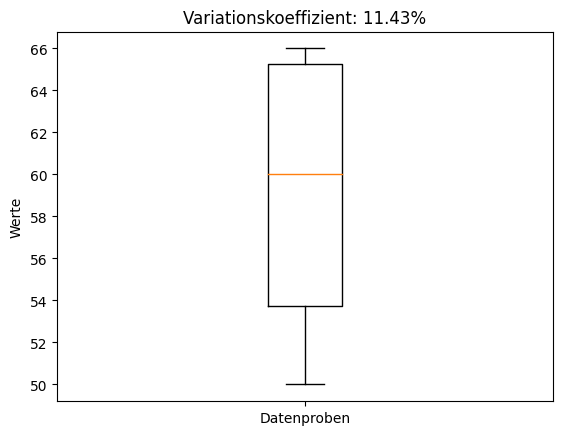

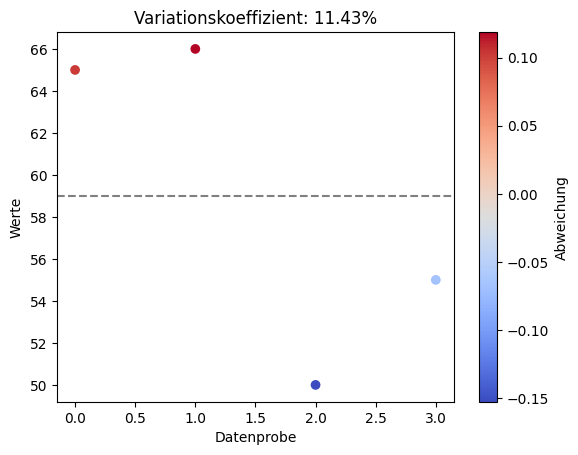

Quartildispersionskoeffizient: 19.17%


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datenproben
daten = [65, 66, 50, 55]

# Berechnung des Variationskoeffizienten
coefficient_of_variation = (np.std(daten) / np.mean(daten)) * 100

# Boxplot
plt.boxplot([daten], labels=['Datenproben'])
plt.ylabel('Werte')
plt.title('Variationskoeffizient: {:.2f}%'.format(coefficient_of_variation))
plt.show()

# Streudiagramm
deviations = [(x - np.mean(daten)) / np.mean(daten) for x in daten]
plt.scatter(range(len(daten)), daten, c=deviations, cmap='coolwarm')
plt.axhline(np.mean(daten), color='gray', linestyle='--')
plt.colorbar(label='Abweichung')
plt.xlabel('Datenprobe')
plt.ylabel('Werte')
plt.title('Variationskoeffizient: {:.2f}%'.format(coefficient_of_variation))
plt.show()



# Berechnung des Interquartilsbereichs (IQR)
q1 = np.percentile(daten, 25)
q3 = np.percentile(daten, 75)
iqr = q3 - q1

# Berechnung des Quartildispersionskoeffizienten
median = np.median(daten)
quartile_dispersion_coefficient = (iqr / median) * 100

# Ausgabe des Ergebnisses
print("Quartildispersionskoeffizient: {:.2f}%".format(quartile_dispersion_coefficient))



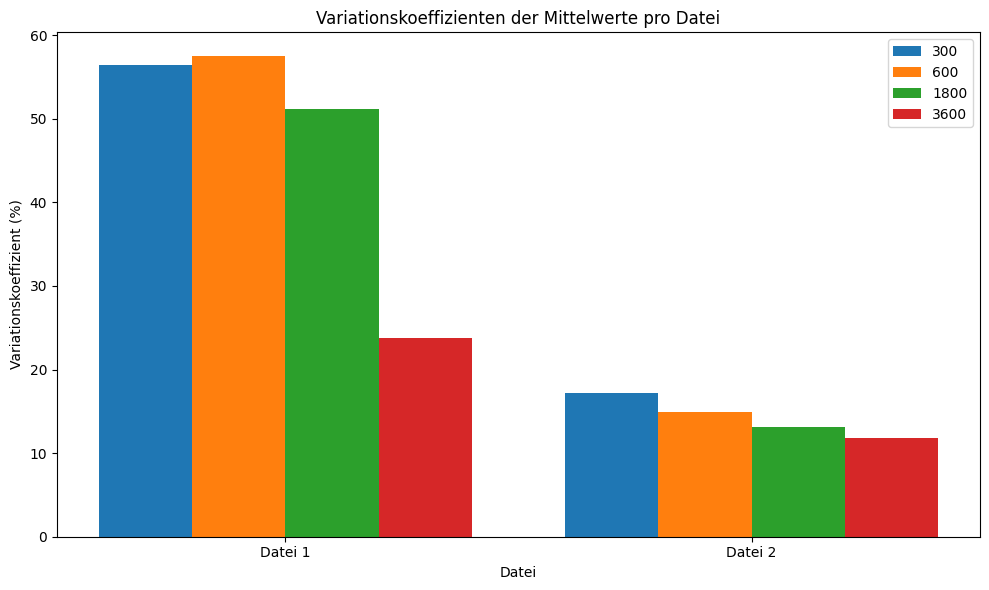

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Array von JSON-Daten (Beispiel)
data_array = [
    {
        "Item1": {
            "_results": [
                {"TP": 0.646551724137931, "FP": 0, "IntervalLen": 300},
                {"TP": 0.6143939393939394, "FP": 0, "IntervalLen": 600},
                {"TP": 0.5535714285714286, "FP": 0, "IntervalLen": 1800},
                {"TP": 0.6351686507936508, "FP": 0, "IntervalLen": 3600}
            ]
        },
        "Item2": {
            "300": [1, 1, 0.5, 0, 0, 0.5, 0.6666666666666666, 1, 0.3333333333333333, 1, 0.5, 1, 1, 1, 0.5, 0.6666666666666666, 0.5, 1, 0.3333333333333333, 0.3333333333333333, 0, 0.6666666666666666, 0.25, 1, 0, 1, 1, 1, 1],
            "600": [1, 1, 0.25, 0, 0.6, 0.5, 1, 0.75, 1, 0.5, 0.6666666666666666, 0.5, 0.5, 0.3333333333333333, 0, 0.6666666666666666, 0.25, 1, 0, 1, 1, 1],
            "1800": [0.625, 0.5, 0.8571428571428571, 0.5714285714285714, 0.375, 0.5, 0, 1],
            "3600": [0.5555555555555556, 0.7142857142857143, 0.4375, 0.8333333333333334]
        }
    },
    {
        "Item1": {
            "_results": [
                {"TP": 0.5, "FP": 0, "IntervalLen": 300},
                {"TP": 0.6, "FP": 0, "IntervalLen": 600},
                {"TP": 0.7, "FP": 0, "IntervalLen": 1800},
                {"TP": 0.8, "FP": 0, "IntervalLen": 3600}
            ]
        },
        "Item2": {
            "300": [0.5, 0.6, 0.7, 0.8],
            "600": [0.6, 0.7, 0.8, 0.9],
            "1800": [0.7, 0.8, 0.9, 1.0],
            "3600": [0.8, 0.9, 1.0, 1.1]
        }
    }
]

# Initialisiere Arrays für Variationskoeffizienten pro Interval
variation_coefficients_300 = []
variation_coefficients_600 = []
variation_coefficients_1800 = []
variation_coefficients_3600 = []

# Iteriere über die Dateien
for data in data_array:
    item2_data = data["Item2"]
    
    # Extrahiere Daten pro Interval
    data_300 = item2_data["300"]
    data_600 = item2_data["600"]
    data_1800 = item2_data["1800"]
    data_3600 = item2_data["3600"]
    
    # Berechne Mittelwerte pro Interval
    mean_300 = np.mean(data_300)
    mean_600 = np.mean(data_600)
    mean_1800 = np.mean(data_1800)
    mean_3600 = np.mean(data_3600)
    
    # Berechne Variationskoeffizienten pro Interval und füge sie zu den entsprechenden Arrays hinzu
    variation_coefficients_300.append(np.std(data_300) / mean_300 * 100)
    variation_coefficients_600.append(np.std(data_600) / mean_600 * 100)
    variation_coefficients_1800.append(np.std(data_1800) / mean_1800 * 100)
    variation_coefficients_3600.append(np.std(data_3600) / mean_3600 * 100)

# Grafische Darstellung
x = np.arange(len(data_array))  # x-Koordinaten für Balkendiagramme
width = 0.2  # Breite der Balken

fig, ax = plt.subplots(figsize=(10, 6))

# Balkendiagramme für Variationskoeffizienten pro Interval
ax.bar(x - 1.5 * width, variation_coefficients_300, width, label="300")
ax.bar(x - 0.5 * width, variation_coefficients_600, width, label="600")
ax.bar(x + 0.5 * width, variation_coefficients_1800, width, label="1800")
ax.bar(x + 1.5 * width, variation_coefficients_3600, width, label="3600")

ax.set_title("Variationskoeffizienten der Mittelwerte pro Datei")
ax.set_xlabel("Datei")
ax.set_ylabel("Variationskoeffizient (%)")
ax.set_xticks(x)
ax.set_xticklabels([f"Datei {i+1}" for i in range(len(data_array))])
ax.legend()

plt.tight_layout()
plt.show()
